# 1. Libraries & Dataset

In [320]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,RocCurveDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [321]:
dataset = pd.read_csv("diabetes.csv")
df = dataset.copy()
df.columns = [col.upper() for col in df.columns]
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [322]:
def check_df(df):
    print("############### Shape ###############")
    print(df.shape)
    print("############### Info ###############")
    print(df.info())

In [323]:
check_df(df)

############### Shape ###############
(768, 9)
############### Info ###############
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PREGNANCIES               768 non-null    int64  
 1   GLUCOSE                   768 non-null    int64  
 2   BLOODPRESSURE             768 non-null    int64  
 3   SKINTHICKNESS             768 non-null    int64  
 4   INSULIN                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DIABETESPEDIGREEFUNCTION  768 non-null    float64
 7   AGE                       768 non-null    int64  
 8   OUTCOME                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


# 2. Exploratory Data Analysis & Data Preprocessing

In [324]:
# num_cols, cat_cols

In [325]:
def grab_col_names(df, cat_th=10, car_th=20):
    
    cat_cols = [col for col in df.columns if df[col].dtypes in ["category", "object", "bool"]]
    
    cat_but_car = [col for col in df.columns if df[col].dtypes in ["category", "object", "bool"] and df[col].nunique() > 20]
    
    num_but_cats = [col for col in df.columns if df[col].dtypes in ["int64", "float64"] and df[col].nunique() < 10]
    
    cat_cols = cat_cols + num_but_cats
    
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    num_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in num_but_cats]
    
    return cat_cols, num_cols

cat_cols, num_cols = grab_col_names(df)

In [326]:
cat_cols # categorical veriables

['OUTCOME']

In [327]:
num_cols # numerical veriables

['PREGNANCIES',
 'GLUCOSE',
 'BLOODPRESSURE',
 'SKINTHICKNESS',
 'INSULIN',
 'BMI',
 'DIABETESPEDIGREEFUNCTION',
 'AGE']

In [328]:
# Analysis of Numerical Veriables

In [329]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
PREGNANCIES,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
GLUCOSE,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BLOODPRESSURE,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SKINTHICKNESS,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
INSULIN,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DIABETESPEDIGREEFUNCTION,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
AGE,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


Glucose, 
BloodPressure, 
SkinThickness,
Insulin,
BMI cannot be 0

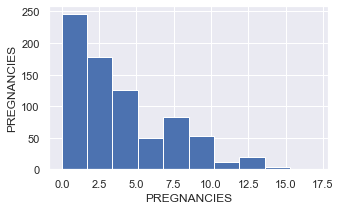

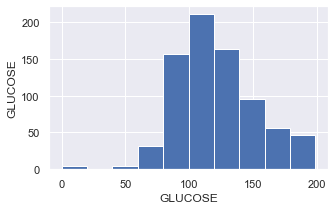

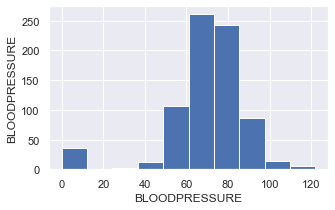

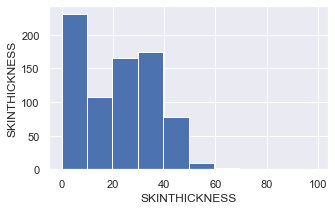

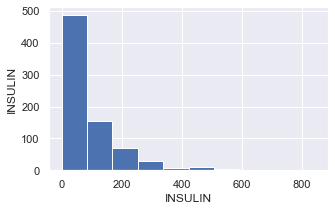

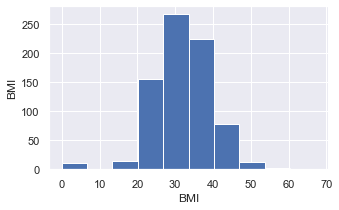

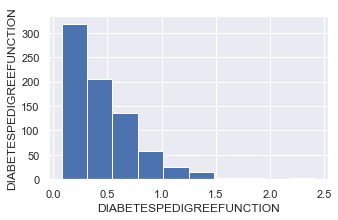

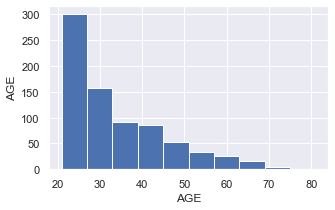

In [330]:
def num_summary(dataframe, numerical_col):
    
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.ylabel(numerical_col)
        plt.show(block=True)
        
for col in num_cols:
    num_summary(df, col)

In [331]:
# Analysis of Target Veriable

In [332]:
df.groupby("OUTCOME")["AGE"].mean()

OUTCOME
0    31.190000
1    37.067164
Name: AGE, dtype: float64

In [410]:
def target_summary(df, target, num_col, plot=False):
    
    print(df.groupby(target)[num_col].mean())
    
    if plot:
        sns.boxplot(x=target, y=num_col, data=df)
        plt.xlabel(target)
        plt.ylabel(num_col)
        plt.title(f"The distribution of variable {num_col} with respect to {target}")
        plt.show(block=True)
        
    print("#######################################################")

OUTCOME
0    0.059600
1    0.368657
Name: PREGNANCIES, dtype: float64


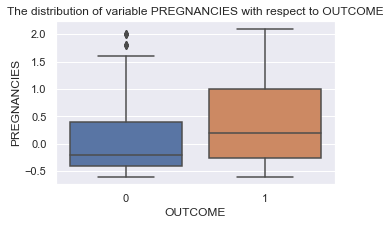

#######################################################
OUTCOME
0   -0.155423
1    0.621226
Name: GLUCOSE, dtype: float64


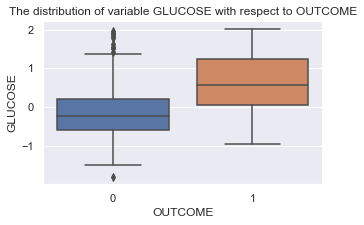

#######################################################
OUTCOME
0   -0.074875
1    0.180198
Name: BLOODPRESSURE, dtype: float64


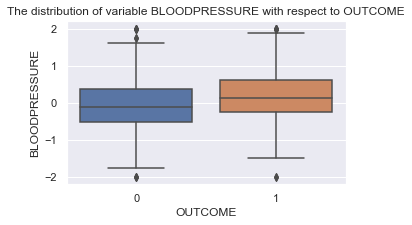

#######################################################
OUTCOME
0    0.202055
1    0.491822
Name: SKINTHICKNESS, dtype: float64


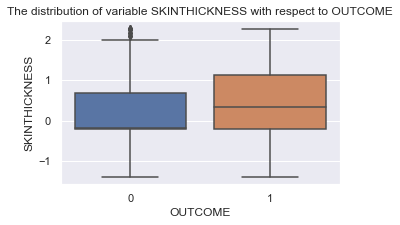

#######################################################
OUTCOME
0    0.357249
1    0.788730
Name: INSULIN, dtype: float64


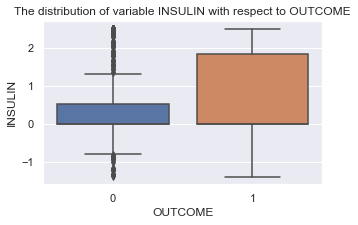

#######################################################
OUTCOME
0   -0.125070
1    0.355825
Name: BMI, dtype: float64


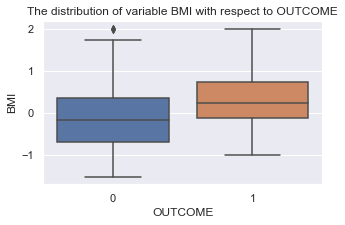

#######################################################
OUTCOME
0    0.124873
1    0.414438
Name: DIABETESPEDIGREEFUNCTION, dtype: float64


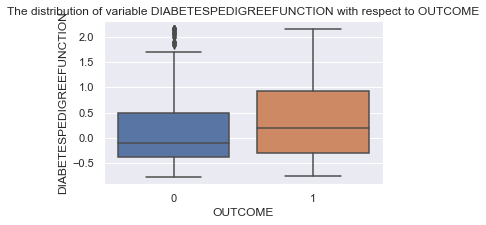

#######################################################
OUTCOME
0    0.125588
1    0.473661
Name: AGE, dtype: float64


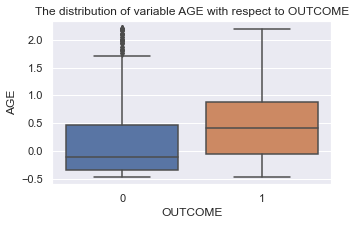

#######################################################


In [411]:
for col in num_cols:
    target_summary(df, "OUTCOME", col, plot=True)

In [335]:
# Correlation Analysis

In [336]:
corr = df.corr()

In [337]:
corr

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
PREGNANCIES,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
GLUCOSE,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BLOODPRESSURE,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SKINTHICKNESS,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
INSULIN,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DIABETESPEDIGREEFUNCTION,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
AGE,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
OUTCOME,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


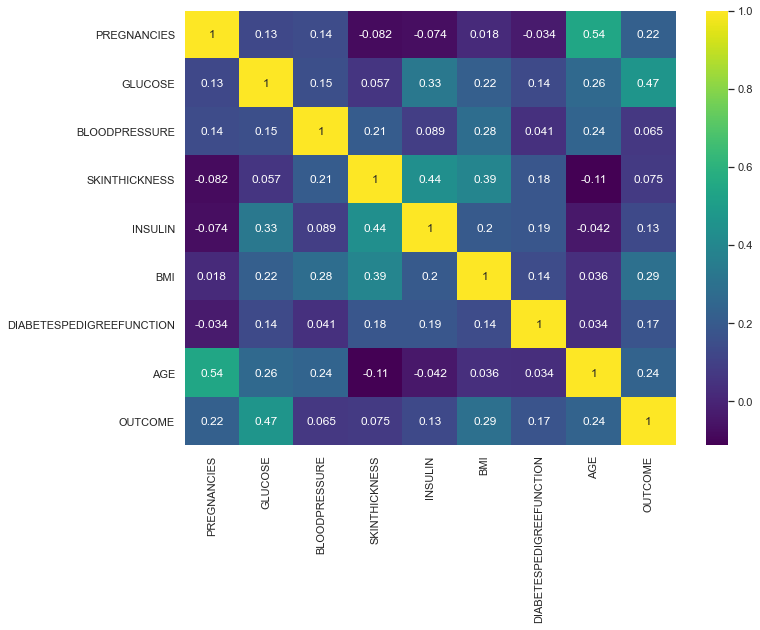

In [338]:
sns.set(rc={"figure.figsize": (11, 8)})

sns.heatmap(corr, cmap='viridis', annot=True);

Since there is a very, very low correlation between Skin Thickness, Blood Pressure and our target variable, I will exclude these two variables from the data set.

In [339]:
# Missing Values Analysis

In [340]:
df.isnull().sum()

PREGNANCIES                 0
GLUCOSE                     0
BLOODPRESSURE               0
SKINTHICKNESS               0
INSULIN                     0
BMI                         0
DIABETESPEDIGREEFUNCTION    0
AGE                         0
OUTCOME                     0
dtype: int64

In [341]:
filled_with_0 = ["GLUCOSE", "BLOODPRESSURE", "SKINTHICKNESS", "INSULIN", "BMI"] # They cannot be 0

In [342]:
for col in filled_with_0:
    col_tf = (df[col] == 0)
    df[col][col_tf] = df[col].mean()

<ipython-input-342-684b02d50528>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][col_tf] = df[col].mean()


In [343]:
df[filled_with_0].describe().T # I filled them with meaning of the related veriable

,count,mean,std,min,25%,50%,75%,max
GLUCOSE,768.0,121.681605,30.436016,44.0,99.750000,117.000000,140.25,199.0
BLOODPRESSURE,768.0,72.254807,12.115932,24.0,64.000000,72.000000,80.00,122.0
SKINTHICKNESS,768.0,26.606479,9.631241,7.0,20.536458,23.000000,32.00,99.0
INSULIN,768.0,118.660163,93.080358,14.0,79.799479,79.799479,127.25,846.0
BMI,768.0,32.450805,6.875374,18.2,27.500000,32.000000,36.60,67.1


In [344]:
# Outlier Analysis

In [345]:
num_cols

['PREGNANCIES',
 'GLUCOSE',
 'BLOODPRESSURE',
 'SKINTHICKNESS',
 'INSULIN',
 'BMI',
 'DIABETESPEDIGREEFUNCTION',
 'AGE']

In [346]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [347]:
for col in num_cols:
    replace_with_thresholds(df, col)

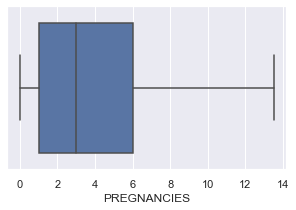

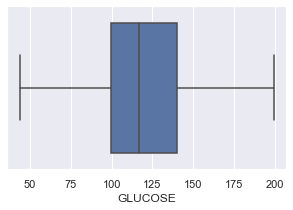

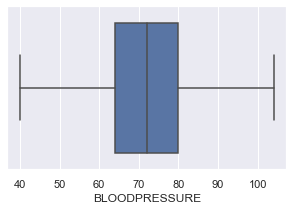

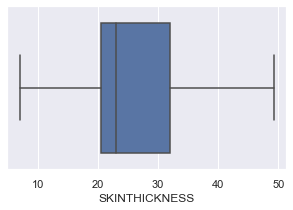

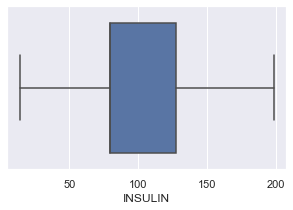

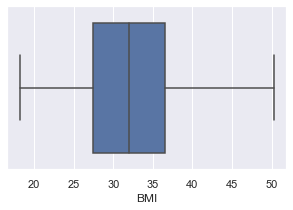

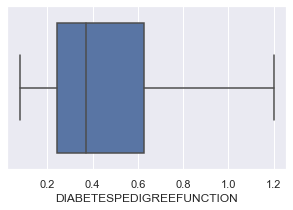

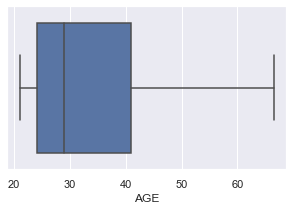

In [348]:
sns.set(rc={"figure.figsize": (5, 3)})

for col in num_cols:
    sns.boxplot(x=df[col])
    plt.show(block=True) # I got rid of outliers.

In [349]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PREGNANCIES,768.0,3.837240,3.344157,0.000,1.000000,3.000000,6.00000,13.500000
GLUCOSE,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.000000
BLOODPRESSURE,768.0,72.226161,11.716722,40.000,64.000000,72.000000,80.00000,104.000000
SKINTHICKNESS,768.0,26.475416,9.112201,7.000,20.536458,23.000000,32.00000,49.195312
INSULIN,768.0,103.895703,46.779152,14.000,79.799479,79.799479,127.25000,198.425781
BMI,768.0,32.388956,6.667633,18.200,27.500000,32.000000,36.60000,50.250000
DIABETESPEDIGREEFUNCTION,768.0,0.458914,0.285596,0.078,0.243750,0.372500,0.62625,1.200000
AGE,768.0,33.199870,11.628404,21.000,24.000000,29.000000,41.00000,66.500000
OUTCOME,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.000000


# 3. Feature Engineering

The process of the filling with meaning of the related veriables which i did above was also a part of feature engineering.

In [350]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31.0,0
2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,1.200,33.0,1


In [351]:
# Created "AGE_CATEGORY"

df["AGE_CATEGORY"] = pd.cut(x=df["AGE"], bins=[21,35,55, df["AGE"].max()],
                           labels=["Young", "Middle-Aged", "Old"],
                           right=False)

In [352]:
df.loc[:, ["AGE", "AGE_CATEGORY"]]

,AGE,AGE_CATEGORY
0,50.0,Middle-Aged
1,31.0,Young
2,32.0,Young
3,21.0,Young
4,33.0,Young
...,...,...
763,63.0,Old
764,27.0,Young
765,30.0,Young
766,47.0,Middle-Aged


In [353]:
# Created "BMI_CATEGORY"

df["BMI_CATEGORY"] = pd.cut(x=df["BMI"], bins=[0, 18.5,24.9,29.9, df["BMI"].max()],
                           labels=["Underweight", "Normal", "Overweight", "Obese"])

In [354]:
df.loc[:, ["BMI", "BMI_CATEGORY"]]

,BMI,BMI_CATEGORY
0,33.6,Obese
1,26.6,Overweight
2,23.3,Normal
3,28.1,Overweight
4,43.1,Obese
...,...,...
763,32.9,Obese
764,36.8,Obese
765,26.2,Overweight
766,30.1,Obese


In [355]:
# Created "GLUCOSE_CATEGORY"

df["GLUCOSE_CATEGORY"] = pd.cut(x=df["GLUCOSE"], bins=[0,70,99,df["GLUCOSE"].max()],
                           labels=["Low", "Normal", "High"])

In [356]:
df.loc[:, ["GLUCOSE", "GLUCOSE_CATEGORY"]]

,GLUCOSE,GLUCOSE_CATEGORY
0,148.0,High
1,85.0,Normal
2,183.0,High
3,89.0,Normal
4,137.0,High
...,...,...
763,101.0,High
764,122.0,High
765,121.0,High
766,126.0,High


In [357]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,AGE_CATEGORY,BMI_CATEGORY,GLUCOSE_CATEGORY
0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50.0,1,Middle-Aged,Obese,High
1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31.0,0,Young,Overweight,Normal
2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32.0,1,Young,Normal,High
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0,Young,Overweight,Normal
4,0.0,137.0,40.0,35.000000,168.000000,43.1,1.200,33.0,1,Young,Obese,High


In [358]:
cat_cols, num_cols = grab_col_names(df)

In [359]:
cat_cols

['AGE_CATEGORY', 'BMI_CATEGORY', 'GLUCOSE_CATEGORY', 'OUTCOME']

In [360]:
num_cols

['PREGNANCIES',
 'GLUCOSE',
 'BLOODPRESSURE',
 'SKINTHICKNESS',
 'INSULIN',
 'BMI',
 'DIABETESPEDIGREEFUNCTION',
 'AGE']

# 4. One Hot Encoding & Scaling

In [361]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,AGE_CATEGORY,BMI_CATEGORY,GLUCOSE_CATEGORY
0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50.0,1,Middle-Aged,Obese,High
1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31.0,0,Young,Overweight,Normal
2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32.0,1,Young,Normal,High
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0,Young,Overweight,Normal
4,0.0,137.0,40.0,35.000000,168.000000,43.1,1.200,33.0,1,Young,Obese,High


In [362]:
for col in cat_cols:
    if col != "OUTCOME":
        df = pd.get_dummies(df, columns = [col], drop_first=True)

In [363]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,AGE_CATEGORY_Middle-Aged,AGE_CATEGORY_Old,BMI_CATEGORY_Normal,BMI_CATEGORY_Overweight,BMI_CATEGORY_Obese,GLUCOSE_CATEGORY_Normal,GLUCOSE_CATEGORY_High
0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50.0,1,1,0,0,0,1,0,1
1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31.0,0,0,0,0,1,0,1,0
2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32.0,1,0,0,1,0,0,0,1
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0,0,0,0,1,0,1,0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,1.200,33.0,1,0,0,0,0,1,0,1


In [412]:
# RobustScaler

In [364]:
num_cols

['PREGNANCIES',
 'GLUCOSE',
 'BLOODPRESSURE',
 'SKINTHICKNESS',
 'INSULIN',
 'BMI',
 'DIABETESPEDIGREEFUNCTION',
 'AGE']

In [365]:
df[num_cols] = RobustScaler().fit_transform(df[num_cols])

In [366]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,AGE_CATEGORY_Middle-Aged,AGE_CATEGORY_Old,BMI_CATEGORY_Normal,BMI_CATEGORY_Overweight,BMI_CATEGORY_Obese,GLUCOSE_CATEGORY_Normal,GLUCOSE_CATEGORY_High
0,0.6,0.765432,0.000,1.046797,0.000000,0.175824,0.665359,1.235294,1,1,0,0,0,1,0,1
1,-0.4,-0.790123,-0.375,0.523398,0.000000,-0.593407,-0.056209,0.117647,0,0,0,0,1,0,1,0
2,1.0,1.629630,-0.500,-0.214902,0.000000,-0.956044,0.783007,0.176471,1,0,0,1,0,0,0,1
3,-0.4,-0.691358,-0.375,0.000000,0.299270,-0.428571,-0.537255,-0.470588,0,0,0,0,1,0,1,0
4,-0.6,0.493827,-2.000,1.046797,1.858789,1.219780,2.163399,0.235294,1,0,0,0,0,1,0,1


# Train - Test Split & ML Models

In [367]:
y = df["OUTCOME"]
X = df.drop("OUTCOME", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.20)

In [368]:
# ML Models

In [405]:
def train_predict_results(model, report=False):

    model = model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    if report:
        
        print("Model Name: {}".format(repr(model).split("(")[0]))

        print("Classification Report: {}".format(classification_report(y_test, y_pred)))

        print("ROC_AUC_Score: {}".format(roc_auc_score(y_test, y_prob)))
        RocCurveDisplay.from_predictions(y_test, y_prob, name=model);

        cv_results = cross_validate(model,
                               X, y,
                               cv=5,
                               scoring=["accuracy","precision","recall","f1","roc_auc"])
        print("Accuracy Mean from Cross-Validation Results: {}".format(cv_results["test_accuracy"].mean()))
        print("Precision Mean from Cross-Validation Results: {}".format(cv_results["test_precision"].mean()))
        print("Recall Mean from Cross-Validation Results: {}".format(cv_results["test_recall"].mean()))
        print("F1 Score Mean from Cross-Validation Results: {}".format(cv_results["test_f1"].mean()))
        print("AUC Score Mean from Cross-Validation Results: {}".format(cv_results["test_roc_auc"].mean()))
   
    
    return model

Model Name: LogisticRegression
Classification Report:               precision    recall  f1-score   support

           0       0.79      0.89      0.84        99
           1       0.74      0.58      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154

ROC_AUC_Score: 0.8662993572084481
Accuracy Mean from Cross-Validation Results: 0.7708598590951532
Precision Mean from Cross-Validation Results: 0.7079000739870305
Recall Mean from Cross-Validation Results: 0.5971348707197764
F1 Score Mean from Cross-Validation Results: 0.6455089460803747
AUC Score Mean from Cross-Validation Results: 0.8465667365478687


LogisticRegression()

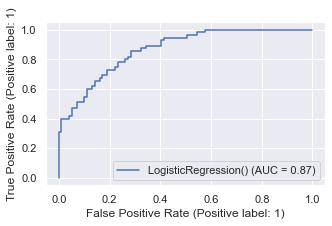

In [406]:
train_predict_results(LogisticRegression(), report=True)

Model Name: RandomForestClassifier
Classification Report:               precision    recall  f1-score   support

           0       0.79      0.89      0.84        99
           1       0.74      0.58      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154

ROC_AUC_Score: 0.8544536271808999
Accuracy Mean from Cross-Validation Results: 0.7630761395467278
Precision Mean from Cross-Validation Results: 0.6846671190500407
Recall Mean from Cross-Validation Results: 0.6045422781271838
F1 Score Mean from Cross-Validation Results: 0.639025218635946
AUC Score Mean from Cross-Validation Results: 0.8304716981132076


RandomForestClassifier()

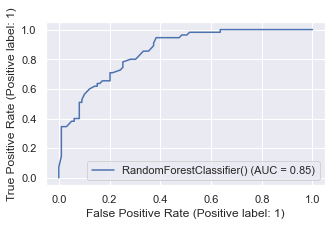

In [407]:
train_predict_results(RandomForestClassifier(), report=True)

Model Name: DecisionTreeClassifier
Classification Report:               precision    recall  f1-score   support

           0       0.79      0.73      0.76        99
           1       0.57      0.65      0.61        55

    accuracy                           0.70       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.71      0.70      0.71       154

ROC_AUC_Score: 0.6909090909090909
Accuracy Mean from Cross-Validation Results: 0.7045412104235633
Precision Mean from Cross-Validation Results: 0.5897423211708925
Recall Mean from Cross-Validation Results: 0.5522711390635918
F1 Score Mean from Cross-Validation Results: 0.5671463299907354
AUC Score Mean from Cross-Validation Results: 0.669135569531796


DecisionTreeClassifier()

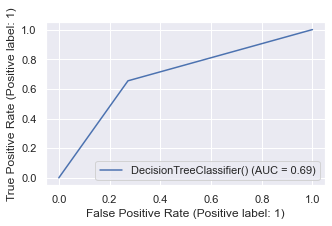

In [408]:
train_predict_results(DecisionTreeClassifier(), report=True)

In [409]:
# Prediction for A New Observation

X.columns

random_user = X.sample(1, random_state=41)

model = train_predict_results(LogisticRegression())

model.predict(random_user) # Not Diabetic

array([0], dtype=int64)